Présenté par Ahmed Mohamed et Sofiene Fehri

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
class regression_gradient:
    def __init__(self,lamda, alpha):
        self.lamda = lamda
        self.alpha = alpha
        
    def plot_function(self,X, function_type = 'Linear'):
        plt.figure('1', figsize = (20,5))
        plt.xlim(-10,10)
        plt.xlabel(function_type +' x')
        plt.ylabel(function_type + 'h(x)')
        plt.plot(X,(self.train_inputs@self.theta.T), label = function_type +' : lamda = ' + str(self.lamda))
        plt.grid(True)
        plt.legend()
    
    def train(self, train_inputs,train_labels, iters):
        m = len(train_inputs) 
        self.train_inputs = train_inputs
        self.train_labels = train_labels
        ones = np.ones([train_inputs.shape[0],1])
        self.train_inputs = np.concatenate((ones,train_inputs),axis=1)
        self.cost = np.zeros((iters,1))
        self.theta = np.zeros([1,self.train_inputs.shape[1]])
        
        cost = np.zeros((iters,1))
        for i in range(iters):
            theta_0 = self.theta[:,0]
            train_inputs_0 = self.train_inputs[:,0]
            theta_0 = theta_0.reshape((len(theta_0)),1)
            train_inputs_0 = train_inputs_0.reshape((len(train_inputs_0),1))

            theta_0 = theta_0 - (self.alpha/m) * (np.sum((train_inputs_0 @ theta_0.T - self.train_labels)
                                                         * train_inputs_0, axis=0))
            self.theta[:,0] = theta_0
            self.theta[:,1:] = self.theta[:,1:] - ((self.alpha/m) * (np.sum((self.train_inputs[:,1:] 
                                                                             @ self.theta[:,1:].T - self.train_labels)
                                                                     *self.train_inputs[:,1:] , axis=0))
                                                        +(self.lamda/m)*self.theta[:,1:])

            cost[i] = np.sum(np.power(((self.train_inputs @ self.theta.T)-self.train_labels),2))/(2 * m)
            
    def compute_prediction(self, test_inputs):
        ones = np.ones([test_inputs.shape[0],1])
        test_inputs = np.concatenate((ones,test_inputs),axis=1)
        return test_inputs@self.theta.T
    
    def average_error(self, test_labels, predictions):
        n = len(test_labels)
        return np.mean((test_labels-predictions)**2)


In [47]:
 def feature_normalize(X):
        std = np.std(X,axis=0,ddof=1)
        std[std==0] = 1
        norm = (X-np.mean(X,axis=0))/std
        norm[norm == 0] = 1
        return norm

In [48]:
def h(x):
    return np.sin(x) + 0.3 * x - 1

In [49]:
def polynomial_transformation(X,degree):
    input_df = pd.DataFrame({'x1':X[:,0]})
    poly = PolynomialFeatures(degree,interaction_only=False)
    return input_df,poly

In [50]:
def divide_sets(data, labels, percentage):
    idx = int(percentage*len(data))

    train_inputs = data[:idx]
    if len(train_inputs.shape) == 1:
        train_inputs = train_inputs.reshape((len(train_inputs),1))
    train_labels = labels[:idx]
    if len(train_labels.shape) == 1:
        train_labels = train_labels.reshape((len(train_labels),1))
    
    test_inputs = data[idx:]
    if len(test_inputs.shape) == 1:
        test_inputs = test_inputs.reshape((len(test_inputs),1))
    test_labels = labels[idx:]
    if len(test_labels.shape) == 1:
        test_labels = test_labels.reshape((len(test_labels),1))
        
    return train_inputs, train_labels, test_inputs, test_labels

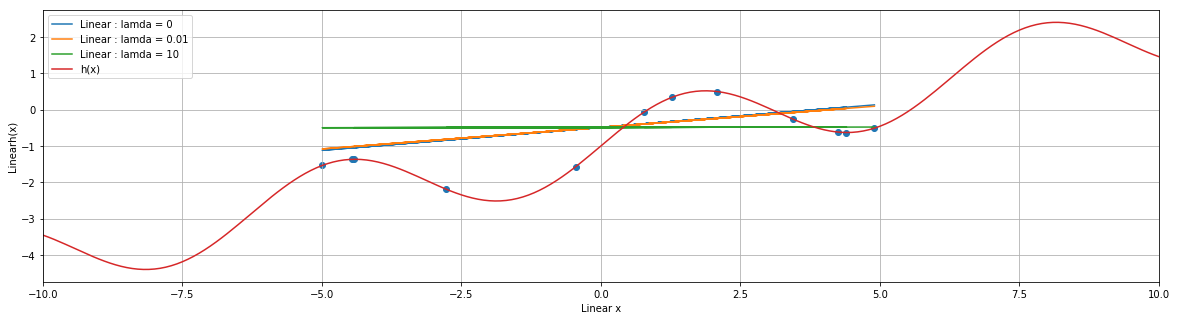

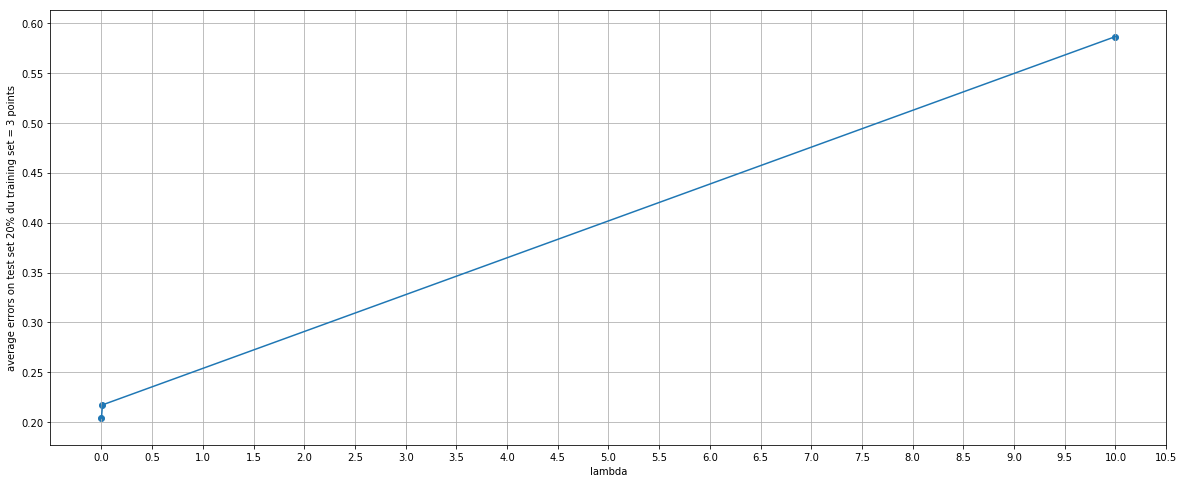

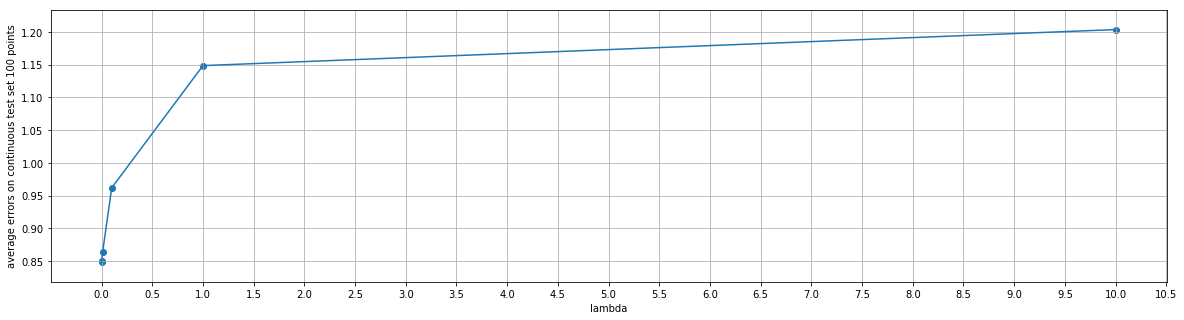

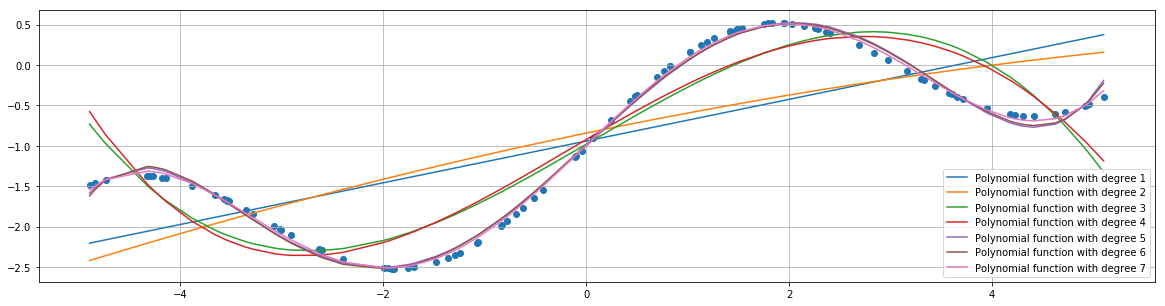

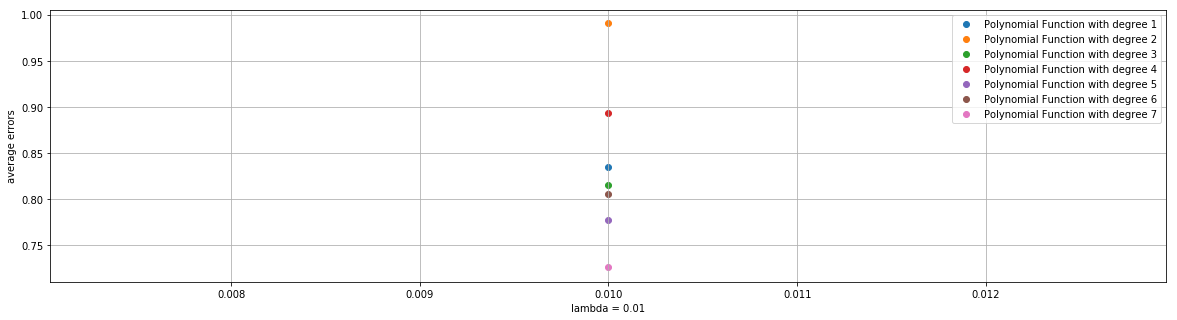

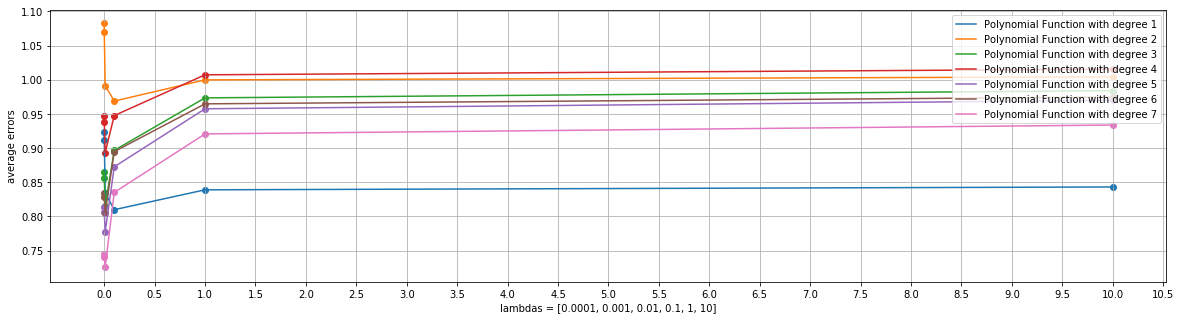

In [72]:
def main():

    data = np.random.uniform(-5,5.1,15)
    labels = h(data)
    
    train_inputs, train_labels, test_inputs, test_labels = divide_sets(data,labels,0.8)
    
    t = np.arange(-10,10.1, 0.1)
    t = t-np.mean(t)/np.sqrt(np.var(t))
    
    x = np.random.uniform(-5,5.1,100)
    x = x.reshape(len(x),1)
    y = h(x)
    
    x_train_inputs, x_train_labels, x_test_inputs, x_test_labels = divide_sets(x,y,0.8)
    n_iterations = 1000
    
    lambdas = [0,0.01,10]
    average_error, average_error_x = [], []
    average_error_poly, average_error_poly_fix = {}, {}
    
    
    for l in lambdas:
        reg_grad = regression_gradient(l, 0.001)
        reg_grad.train(train_inputs, train_labels, n_iterations)
        predictions = reg_grad.compute_prediction(test_inputs)
        average_error.append(reg_grad.average_error(test_labels,predictions))
        reg_grad.plot_function(train_inputs)
   
    plt.scatter(train_inputs,train_labels)
    plt.plot(t,h(t), label = 'h(x)')
    plt.legend()
    
    plt.figure(figsize=(20,5))
    plt.xlabel('lambda')
    plt.ylabel('average errors on test set 20% du training set = 3 points')
    plt.grid(True)
    plt.scatter(lambdas, average_error)
    plt.plot(lambdas, average_error)
    plt.xticks(np.arange(min(lambdas), max(lambdas)+1, 0.5)) 
    
    lambdas_q5 = [0.0001, 0.001, 0.01, 0.1, 1, 10]
    for l in lambdas_q5:
        reg_grad = regression_gradient(l, 0.001)
        reg_grad.train(train_inputs, train_labels, n_iterations)
        predictions = reg_grad.compute_prediction(x)
        average_error_x.append(reg_grad.average_error(y,predictions))
    
    plt.figure(figsize=(20,5))
    plt.xlabel('lambda')
    plt.ylabel('average errors on continuous test set 100 points')
    plt.grid(True)
    plt.scatter(lambdas_q5, average_error_x)
    plt.plot(lambdas_q5, average_error_x)
    plt.xticks(np.arange(min(lambdas_q5), max(lambdas_q5)+1, 0.5))  
    
    poly_model = Ridge(alpha=0.01) 
    plt.figure(figsize=(20,5))
    plt.grid(True)
    plt.scatter(x,h(x))
    
    stop = 8
    step = 1
    
    for i in range(1,stop,step):
        
        df,poly = polynomial_transformation(x,i)
        poly_train = poly.fit_transform(df)
        poly_train = feature_normalize(poly_train)
        poly_model.fit(poly_train,y)
        x_pred_train = poly_model.predict(poly_train)
        new_X, new_y = zip(*sorted(zip(x, x_pred_train)))
        plt.plot(new_X, new_y, label ="Polynomial function with degree "+str(i))
        plt.legend()

    
    for i in range(1,stop,step):
        average_error_poly[i], average_error_poly_fix[i]  = [], []
        df,poly = polynomial_transformation(train_inputs,i)
        poly_train = poly.fit_transform(df)
        poly_train = feature_normalize(poly_train)
        poly_model.fit(poly_train,train_labels)
        
        df_test,poly_test = polynomial_transformation(test_inputs,i)
        poly_test = poly.fit_transform(df_test)
        poly_test = feature_normalize(poly_test)
        x_pred = poly_model.predict(poly_test)
        new_X, new_y = zip(*sorted(zip(test_inputs, x_pred)))
        
        df_x,poly_x = polynomial_transformation(x,i)
        x_poly_train = poly.fit_transform(df_x)
        x_poly_train = feature_normalize(x_poly_train)
        
        reg_grad = regression_gradient(0.01, 0.001)
        reg_grad.train(poly_train, train_labels, n_iterations)
        predictions = reg_grad.compute_prediction(x_poly_train)
        average_error_poly_fix[i].append(reg_grad.average_error(h(x_poly_train),predictions))
        
        

        for l in lambdas_q5:
            reg_grad = regression_gradient(l, 0.001)
            reg_grad.train(poly_train, train_labels, n_iterations)
            predictions = reg_grad.compute_prediction(x_poly_train)
            average_error_poly[i].append(reg_grad.average_error(h(x_poly_train),predictions))
    
    plt.figure(figsize=(20,5))
    plt.grid(True)
    
    for i in average_error_poly.keys():
        plt.xlabel('lambda = 0.01')
        plt.ylabel('average errors')
        plt.grid(True)
        plt.scatter(0.01, average_error_poly_fix[i], label = "Polynomial Function with degree "+str(i))
        plt.legend(loc='upper right')
    
    plt.figure(figsize=(20,5))
    plt.grid(True)
    for i in average_error_poly.keys():
        plt.xlabel('lambdas = [0.0001, 0.001, 0.01, 0.1, 1, 10]')
        plt.ylabel('average errors')
        plt.grid(True)
        plt.scatter(lambdas_q5, average_error_poly[i])
        plt.plot(lambdas_q5, average_error_poly[i], label = "Polynomial Function with degree "+str(i))
        plt.xticks(np.arange(min(lambdas_q5), max(lambdas_q5)+1, 0.5))
        plt.legend(loc='upper right')
    plt.show()
    
main()
